# Modelo Generativo

In [25]:
import scipy.io as sio
import numpy.matlib as mat
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

(150L, 1L) (150L, 4L)


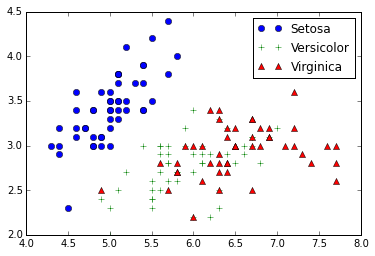

In [26]:
data = sio.loadmat('fisheriris.mat')
X = data['meas']
T = np.concatenate((np.array(mat.repmat([0],50,1)),np.array(mat.repmat([1],50,1)),np.array(mat.repmat([2],50,1))),axis = 0)
targets = np.ravel(T)
print T.shape,X.shape
plt.plot(X[0:50,0],X[0:50,1],'o')
plt.plot(X[50:100,0],X[50:100,1],'+')
plt.plot(X[100:150,0],X[100:150,1],'^')

plt.legend({'Setosa','Versicolor','Virginica'})
plt.show()

#print T

In [27]:
# Mu y sigma K=1
X2 = X[50:100,:]
mu_2 = np.mean(X2,axis=0)
N2 = len(X2)
Mu2 = mat.repmat(mu_2,N2,1)
aux = (X2-Mu2)
S2 = (1./N2)*(aux.T).dot(aux)

# Mu y sigma K=3
X3 = X[100:150,:]
mu_3 = np.mean(X3,axis=0)
N3 = len(X3)
Mu3 = mat.repmat(mu_3,N3,1)
aux = (X3-Mu3)
S3 = (1./N3)*(aux.T).dot(aux)

# Mu y sigma K=1
X1 = X[0:50,:]
mu_1 = np.mean(X1,axis=0)
N1 = len(X1)
Mu1 = mat.repmat(mu_1,N1,1)
aux = (X1-Mu1)
S1 = (1./N1)*(aux.T).dot(aux)
print N1,N2,N3
pi1 = N1/float(N1+N2+N3)
pi2 = N2/float(N1+N2+N3)
pi3 = N3/float(N1+N2+N3)

# Sigma

Sigma = pi1*S1 + pi2*S2 + pi3*S3

# Se calculan los w_k
muK = np.concatenate((mu_1,mu_2,mu_3)).reshape(3,4).T
#print muK.shape
invSigma = np.linalg.inv(Sigma)
wk = invSigma.dot(muK)
print 'wk = ',wk
# para wk0
wk0_1 = -0.5*mu_1.T.dot(invSigma.dot(mu_1))+np.log(pi1)
wk0_2 = -0.5*mu_2.T.dot(invSigma.dot(mu_2))+np.log(pi2)
wk0_3 = -0.5*mu_3.T.dot(invSigma.dot(mu_3))+np.log(pi3)
wk0 = [wk0_1,wk0_2,wk0_3]

# ak
#Wk0 = mat.repmat(wk0,len(X),1)
ak = X.dot(wk)+mat.repmat(wk0,len(X),1)

# Softmax
N,K = ak.shape
#print N,K
yEst = np.zeros((N,K))
for i in range(0, K):
    yEst[:,i] = np.exp(ak[:,i])/np.sum(np.exp(ak),axis=1)
kEst = np.argmax(yEst,axis=1)

#print kEst
error = (kEst-np.ravel(T))
error[error!=0] = 1

perError = np.sum(error)/float(N)
print 'Porcentaje de acierto acc = ',1-perError,'%'

50 50 50
wk =  [[ 24.02465992  16.01858069  12.69984591]
 [ 24.06925561   7.21684677   3.7604894 ]
 [-16.76595819   5.31780708  13.02708671]
 [-17.75348039   6.56554     21.50929899]]
Porcentaje de acierto acc =  0.98 %
